In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
 
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")

url = "../data/clean/boardgames_df_cleaned.csv"

boardgames = pd.read_csv(config['input_data']['file'])

/var/folders/y1/9ww9qd857d59r9rnwfvnykh40000gn/T/ipykernel_16346/1314617518.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


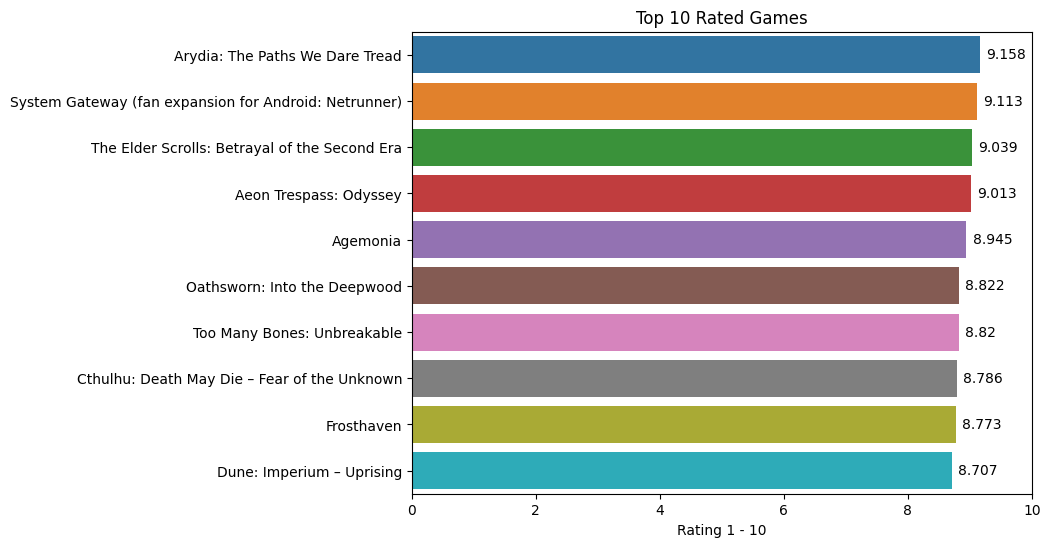

In [2]:
#Top 10 games by ranking

top10_ranking = boardgames[["boardgame", "avg_rating"]].nlargest(10, "avg_rating")

plt.figure(figsize=(8,6))
ax = sns.barplot(x="avg_rating", y="boardgame", data=top10_ranking)

ax = sns.barplot(
    x="avg_rating",
    y="boardgame",
    data=top10_ranking,
)


#text labels
for i, v in enumerate(top10_ranking["avg_rating"]):
    ax.text(v + 0.1, i, str(v), color="black", va="center")
    
plt.xlim(0, 10)
plt.xlabel("Rating 1 - 10")
plt.ylabel("")
plt.title("Top 10 Rated Games")
plt.show()

/var/folders/y1/9ww9qd857d59r9rnwfvnykh40000gn/T/ipykernel_16346/2924562419.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


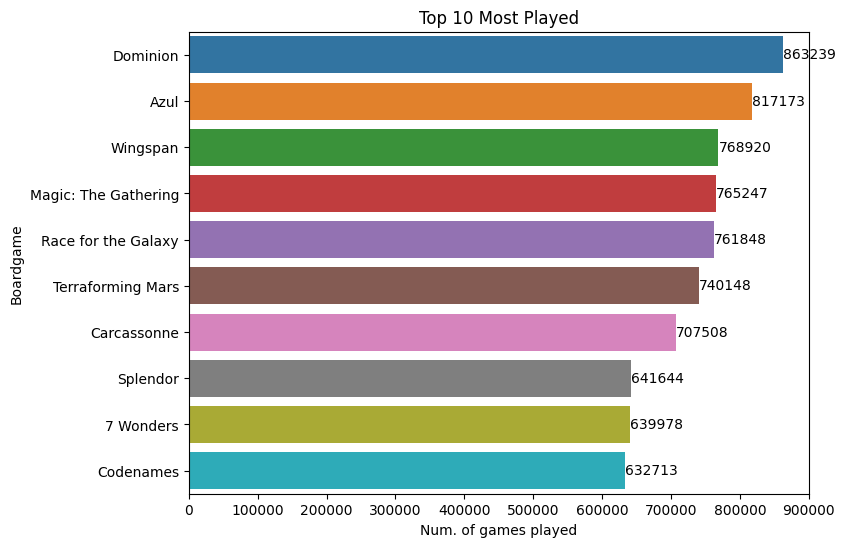

In [3]:
#top 10 overall most played

top10_overall = boardgames[["boardgame", "total_plays"]].nlargest(10, "total_plays")

plt.figure(figsize=(8,6))
ax = sns.barplot(x="total_plays", y="boardgame", data=top10_overall)

ax = sns.barplot(
    x="total_plays",
    y="boardgame",
    data=top10_overall,
    )


#text labels
for i, v in enumerate(top10_overall["total_plays"]):
    ax.text(v + 0.1, i, str(v), color='black', va='center')

plt.xlim(0, 900000)
plt.xlabel("Num. of games played")
plt.ylabel("")
plt.title("Top 10 Most Played")
plt.show()

/var/folders/y1/9ww9qd857d59r9rnwfvnykh40000gn/T/ipykernel_16346/1571436426.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


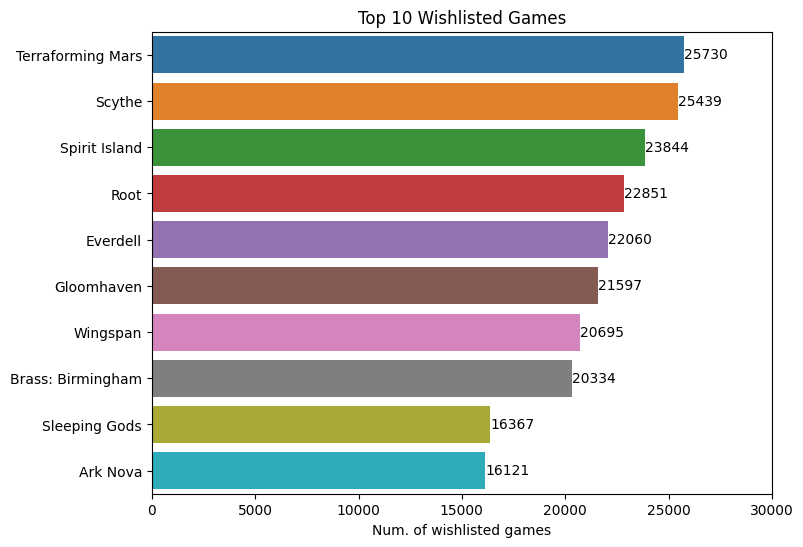

In [4]:
#top 10 wishlisted #

top10_wishlisted = boardgames[["boardgame", "wishlisted"]].nlargest(10, "wishlisted")

plt.figure(figsize=(8,6))
ax = sns.barplot(x="wishlisted", y="boardgame", data=top10_wishlisted)

ax = sns.barplot(
    x="wishlisted",
    y="boardgame",
    data=top10_wishlisted,
    )


#text labels
for i, v in enumerate(top10_wishlisted["wishlisted"]):
    ax.text(v + 0.5, i, str(v), color="black", va="center")
    
plt.xlim(0, 30000)
plt.xlabel("Num. of wishlisted games")
plt.ylabel("")
plt.title("Top 10 Wishlisted Games")
plt.show()

C:\Users\LAP-MPC\AppData\Local\Temp\ipykernel_10644\1054892439.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_rating", y="boardgame", data=top10_ranking, palette=get_colors(top10_ranking))


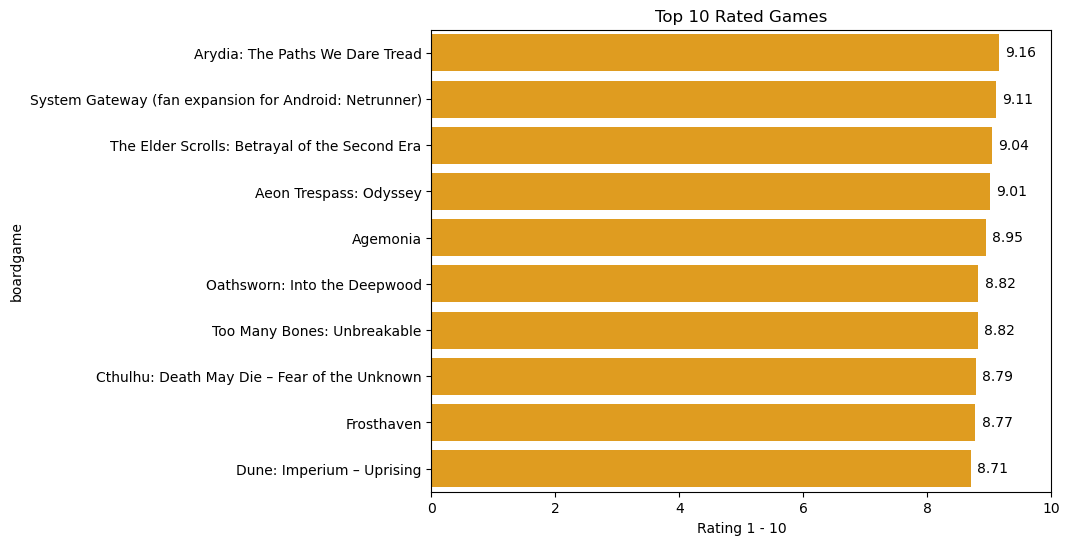

C:\Users\LAP-MPC\AppData\Local\Temp\ipykernel_10644\1054892439.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_plays", y="boardgame", data=top10_overall, palette=get_colors(top10_overall))


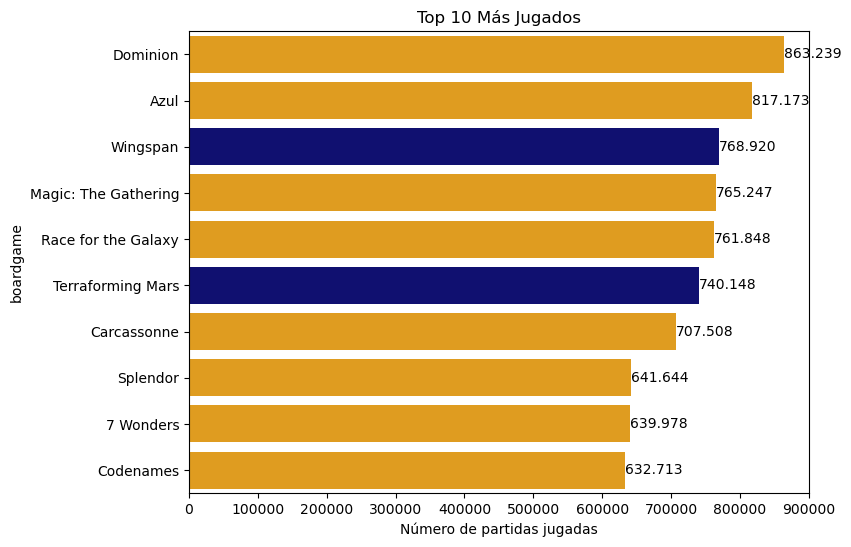

C:\Users\LAP-MPC\AppData\Local\Temp\ipykernel_10644\1054892439.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="wishlisted", y="boardgame", data=top10_wishlisted, palette=get_colors(top10_wishlisted))


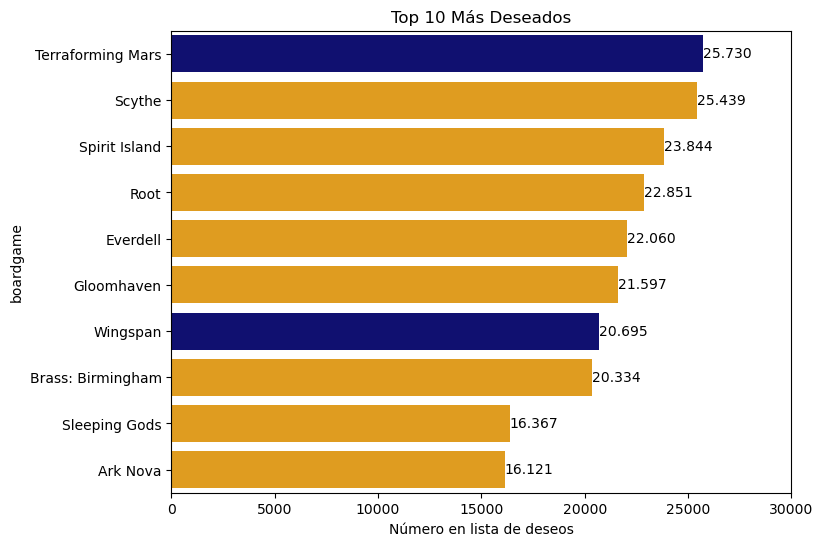

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

# --- Load config and data ---
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")

boardgames = pd.read_csv(config['input_data']['file'])

# --- Top 10 lists ---
top10_ranking = boardgames[["boardgame", "avg_rating"]].nlargest(10, "avg_rating")
top10_overall = boardgames[["boardgame", "total_plays"]].nlargest(10, "total_plays")
top10_wishlisted = boardgames[["boardgame", "wishlisted"]].nlargest(10, "wishlisted")

# --- Count appearances across lists ---
all_games = (
    list(top10_ranking["boardgame"]) +
    list(top10_overall["boardgame"]) +
    list(top10_wishlisted["boardgame"])
)

game_counts = {}
for game in all_games:
    game_counts[game] = game_counts.get(game, 0) + 1

# --- Color function: navy if in >1 list, orange otherwise ---
def get_colors(df):
    return ["navy" if game_counts.get(game, 0) > 1 else "orange" for game in df["boardgame"]]

# --- Format number with dot as thousands separator ---
def format_number(value):
    return f"{value:,.0f}".replace(",", ".")

# --- Plot: Top 10 Rated ---
plt.figure(figsize=(8,6))
sns.barplot(x="avg_rating", y="boardgame", data=top10_ranking, palette=get_colors(top10_ranking))
for i, v in enumerate(top10_ranking["avg_rating"]):
    plt.text(v + 0.1, i, f"{v:.2f}", color="black", va="center")
plt.xlim(0, 10)
plt.xlabel("Rating 1 - 10")
plt.title("Top 10 Rated Games")
plt.show()

# --- Plot: Top 10 Most Played ---
plt.figure(figsize=(8,6))
sns.barplot(x="total_plays", y="boardgame", data=top10_overall, palette=get_colors(top10_overall))
for i, v in enumerate(top10_overall["total_plays"]):
    plt.text(v + 0.1, i, format_number(v), color="black", va="center")
plt.xlim(0, 900000)
plt.xlabel("Número de partidas jugadas")
plt.title("Top 10 Más Jugados")
plt.show()

# --- Plot: Top 10 Wishlisted ---
plt.figure(figsize=(8,6))
sns.barplot(x="wishlisted", y="boardgame", data=top10_wishlisted, palette=get_colors(top10_wishlisted))
for i, v in enumerate(top10_wishlisted["wishlisted"]):
    plt.text(v + 0.5, i, format_number(v), color="black", va="center")
plt.xlim(0, 30000)
plt.xlabel("Número en lista de deseos")
plt.title("Top 10 Más Deseados")
plt.show()
